## CNN using MNIST dataset

In [1]:
# keras imports for the dataset and building our neural network
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D,Flatten
from keras.utils import np_utils
import numpy as np
import pandas as pd

In [2]:
# loading the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# let's print the shape of the dataset

In [3]:
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


5


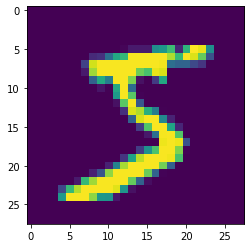

In [4]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])
print(y_train[0])


0


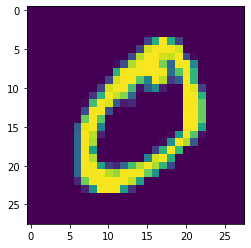

In [5]:
plt.imshow(X_train[1])
print(y_train[1])

In [6]:
# Flattening the images from the 28x28 pixels to 1D 784 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [7]:
# normalizing the data to help with the training
X_train /= 255
X_test /= 255

In [8]:
## Target Classes
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [9]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [13]:
# building a linear stack of layers with the sequential model
model = Sequential()
# hidden layer
model.add(Dense(128, input_shape=(784,), activation='relu'))
# output layer
model.add(Dense(10, activation='softmax'))

In [14]:
# looking at the model summary
model.summary()
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
# training the model for 10 epochs
model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 1s 1ms/step - loss: 0.3664 - accuracy: 0.8980 - val_loss: 0.1976 - val_accuracy: 0.9434
Epoch 2/10
469/469 [==============================] - 1s 1ms/step - loss: 0.1685 - accuracy: 0.9525 - val_loss: 0.1403 - val_accuracy: 0.9571
Epoch 3/10
469/469 [==============================] - 1s 1ms/step - loss: 0.1218 - accuracy: 0.9646 - val_loss: 0.1114 - val_accuracy: 0.9657
Epoch 4/10
469/469

In [16]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 0s 507us/step - loss: 0.0673 - accuracy: 0.9790


[0.06726906448602676, 0.9789999723434448]

### Using Convolution Layer

In [17]:
# loading the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [18]:
# building the input vector from the 28x28 pixels
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [19]:
# normalizing the data to help with the training
X_train /= 255
X_test /= 255

In [20]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [21]:
# building a linear stack of layers with the sequential model
model = Sequential()

In [22]:
# convolutional layer
model.add(Conv2D(64, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))

model.add(MaxPool2D(pool_size=(2,2)))



In [23]:
# flatten output of conv
model.add(Flatten())

In [24]:
# hidden layer
model.add(Dense(100, activation='relu'))
# output layer
model.add(Dense(10, activation='softmax'))

In [25]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [35]:
# training the model for 10 epoch
# Importing the EarlyStopping call back function
from keras.callbacks import EarlyStopping

# Early Stopping Callback
earlystopping = EarlyStopping(monitor='val_loss', patience=3)


callback = model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
469/469 [==============================] - 39s 83ms/step - loss: 0.0042 - accuracy: 0.9986 - val_loss: 0.0469 - val_accuracy: 0.9884
Epoch 2/10
469/469 [==============================] - 38s 81ms/step - loss: 0.0032 - accuracy: 0.9990 - val_loss: 0.0575 - val_accuracy: 0.9890
Epoch 3/10
469/469 [==============================] - 39s 82ms/step - loss: 0.0041 - accuracy: 0.9986 - val_loss: 0.0548 - val_accuracy: 0.9886
Epoch 4/10
469/469 [==============================] - 38s 82ms/step - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.0548 - val_accuracy: 0.9888
Epoch 5/10
469/469 [==============================] - 40s 86ms/step - loss: 0.0038 - accuracy: 0.9987 - val_loss: 0.0584 - val_accuracy: 0.9890
Epoch 6/10
469/469 [==============================] - 38s 82ms/step - loss: 0.0043 - accuracy: 0.9986 - val_loss: 0.0514 - val_accuracy: 0.9891
Epoch 7/10
469/469 [==============================] - 39s 84ms/step - loss: 0.0020 - accuracy: 0.9995 - val_loss: 0.0458 - val_accuracy:

In [27]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0498 - accuracy: 0.9878


[0.04983878880739212, 0.9878000020980835]

In [28]:
import matplotlib.pyplot as plt

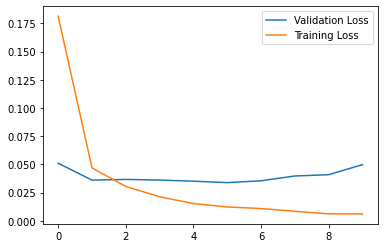

In [29]:
plt.plot(callback.history['val_loss'],label='Validation Loss');
plt.plot(callback.history['loss'],label='Training Loss');
plt.legend();

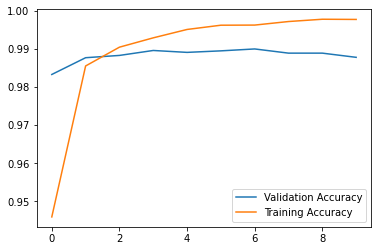

In [30]:
plt.plot(callback.history['val_accuracy'],label='Validation Accuracy');
plt.plot(callback.history['accuracy'],label='Training Accuracy');
plt.legend();

In [25]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0499 - accuracy: 0.9881


[0.04991115257143974, 0.988099992275238]

In [26]:
y_pred = model.predict(X_test)

313/313 [==============================] - 2s 5ms/step


In [27]:
y_pred[:5]

array([[5.94270320e-14, 7.07943686e-13, 1.72148244e-12, 1.30309674e-08,
        1.25990179e-14, 6.38270084e-16, 4.93257331e-20, 1.00000000e+00,
        5.61115528e-18, 3.61811164e-10],
       [2.40295128e-11, 1.24226152e-09, 1.00000000e+00, 6.71544595e-17,
        5.75345300e-14, 1.09846617e-21, 1.49031218e-10, 8.55592447e-18,
        1.03545363e-15, 1.62338232e-16],
       [3.17639942e-11, 9.99999881e-01, 6.34043706e-09, 1.25169557e-14,
        5.83742334e-08, 1.69280812e-10, 2.15084769e-10, 5.12345331e-08,
        3.64444119e-08, 4.21503898e-09],
       [1.00000000e+00, 1.46516795e-14, 1.07638575e-14, 2.25761436e-14,
        1.05796109e-14, 8.33647319e-14, 2.94586361e-12, 8.43864839e-11,
        1.51305482e-16, 1.57103289e-10],
       [1.69307699e-12, 4.32079329e-12, 5.55879941e-13, 2.09411893e-12,
        9.99999523e-01, 2.15129997e-12, 6.23555461e-13, 4.28800268e-12,
        1.79613352e-10, 4.56241708e-07]], dtype=float32)

In [28]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [29]:
import numpy as np
np.mean(np.argmax(np.round(y_pred,3),axis=1) == y_test)

0.9881